
<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>


Thank you so much for your diligence! Linear algebra is not easy, but you did an awesome job here! You can find my new comment with digit 3. I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2 </b>
    
Thank you very much for taking the time to update the project! There's only one issue in task 2. Would you take a look at my new comments with digit 2? 
    
    

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Michael, my name is Svetlana (my handle on Discord is `svetatripleten`). Congratulations on submitting Linear Algebra project! 🎉 I will be using the standard color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. 

    
    
- The NearestNeighbors algorithm was used correctly. Even though it is a simple algorithm, it is still a great tool;
    
    

- Built Linear Regression class, excellent job! 
    
 
- Added the LaTex code that looks great!    
   
    
- You have successfully evaluated and compared metrics on original and obfuscated data, demonstrating that obfuscating the data will not impact the model performance. This is a very important inference because we now know that the model will work with the protected user data;
      
    
- Wrote good conclusions! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
    
- In task 2, please run classifier for both scaled and original data. Don't forget to add a conclusion that describes the results.  
    
      
- In Task 3, please run regression for both scaled and unscaled data;    
      
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a fantastic job here, and I hope you enjoyed this topic. Math can be hard, but it is indeed important in data science. Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<hr>
    
✍️ Check out this link to the [Basics of Linear Algebra](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter14.01-Basics-of-Linear-Algebra.html) chapter from the Python Numerical Methods book. It introduces the basics of linear algebra.
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3669,1,22.0,41400.0,1,0
355,0,45.0,35700.0,2,1
3475,0,42.0,58500.0,1,1
3952,1,38.0,28400.0,0,0
215,1,25.0,48700.0,3,0
4170,1,23.0,31400.0,1,0
3438,0,32.0,42900.0,1,0
497,1,33.0,34700.0,0,0
4667,0,27.0,42500.0,2,0
249,1,40.0,45300.0,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype('int64')

In [7]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?

In [9]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Everything seems to be normal here, customer age ranges from 18 to 65, the number of insurance benefits received over the last 5 years also seems normal (no customer getting over 5), and the gender, income, and family members columns all having realistic values as well!

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

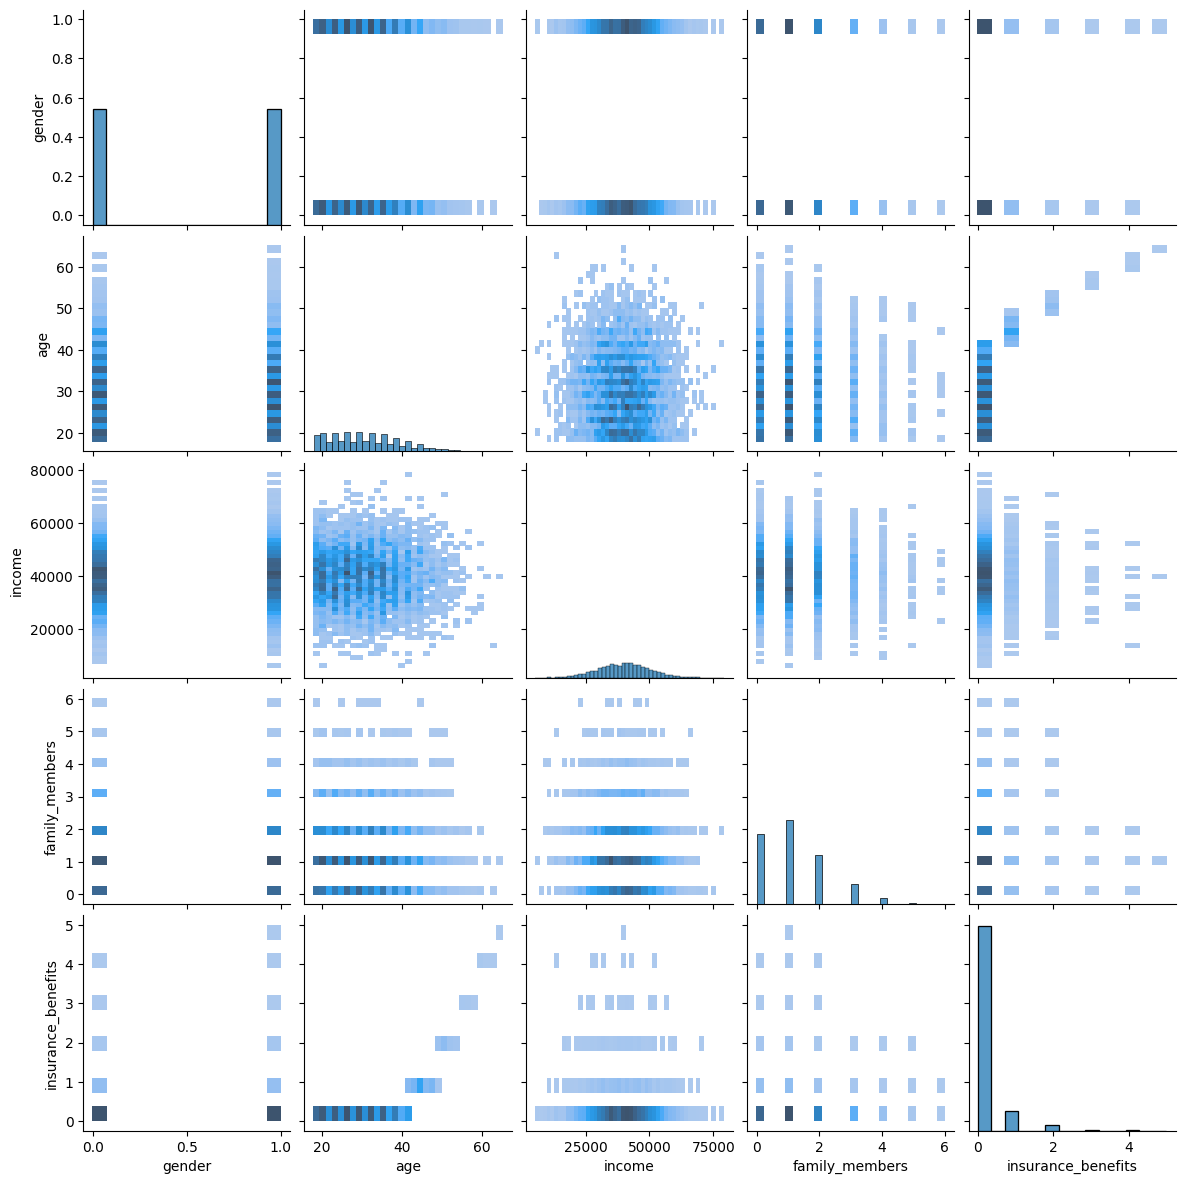

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    #Creates and fits the kNN model for the df
    nbrs = NearestNeighbors(n_neighbors = k, metric = metric)
    nbrs.fit(df[feature_names])
    
    #Finds distances and indices of k neighbors to row n
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    #Creates a new df with neighbors and distances
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

#Converts selected columns to numpy array, learns maximum abs value for each feature
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

#Creates a copy of our df, not touching the raw data
df_scaled = df.copy()

#Applies scaling to the new copied df (just features)
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2288,0.0,0.476923,0.269620,0.166667,0
313,0.0,0.384615,0.413924,0.166667,0
1437,0.0,0.384615,0.451899,0.166667,0
1530,0.0,0.492308,0.570886,0.166667,0
4526,0.0,0.476923,0.587342,0.000000,0


Now, let's get similar records for a given one for every combination

In [15]:
get_knn(df, n = 2500, k = 5, metric = 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
2500,1,29,37600.0,2,0,0.000000
2681,0,29,37600.0,0,0,2.236068
2652,0,31,37600.0,0,0,3.000000
4710,1,30,37600.0,6,0,4.123106
2526,0,25,37600.0,1,0,4.242641


In [16]:
get_knn(df, n = 2500, k = 5, metric = 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
2500,1,29,37600.0,2,0,0.0
2681,0,29,37600.0,0,0,3.0
2652,0,31,37600.0,0,0,5.0
4710,1,30,37600.0,6,0,5.0
3404,0,24,37600.0,2,0,6.0


In [17]:
get_knn(df_scaled, n = 2500, k = 5, metric = 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
2500,1.0,0.446154,0.475949,0.333333,0,0.000000
4797,1.0,0.446154,0.463291,0.333333,0,0.012658
4145,1.0,0.430769,0.473418,0.333333,0,0.015592
1055,1.0,0.461538,0.472152,0.333333,0,0.015846
2062,1.0,0.430769,0.493671,0.333333,0,0.023468


In [18]:
get_knn(df_scaled, n = 2500, k = 5, metric = 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
2500,1.0,0.446154,0.475949,0.333333,0,0.000000
4797,1.0,0.446154,0.463291,0.333333,0,0.012658
4145,1.0,0.430769,0.473418,0.333333,0,0.017916
1055,1.0,0.461538,0.472152,0.333333,0,0.019182
2062,1.0,0.430769,0.493671,0.333333,0,0.033106


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

The data not being scaled has a drastic impact on the kNN algorithm. We can see that in the distance column in the resulting df's above. The first two results show distances such as 2.2, 3, 5, etc., but after scaling the data, the distances close in by multiple factors, with the closest distances being 0.013, 0.016, and 0.018. Without scaling, the larger values (income and age) will influence the distance calculations and result in misleading nearest neighbors.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results between both the Manhattan and Euclidean distance metrics are very similar, regardless of scaling. In the unscaled comparisons, 4 of the first 5 neighbors are the same, and in the scaled comparisons, all 5 of the first 5 neighbors are the same.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good! So Manhattan distance is less sensitive to outliers.

</div>


# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [19]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


In [21]:
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis = 1)
target = df['insurance_benefits_received']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.3, random_state = 2356)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(3500, 4) (1500, 4) (3500,) (1500,)



<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    
> `features = df.drop('insurance_benefits_received', axis = 1)`

You need to drop `insurance_benefits` as well to avoid data leakage. 

</div>

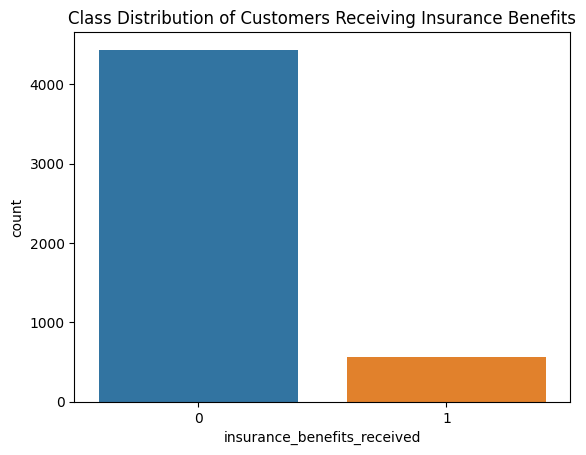

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [22]:
# check for the class imbalance with value_counts()
sns.countplot(x = df['insurance_benefits_received'])
plt.title('Class Distribution of Customers Receiving Insurance Benefits')
plt.show()

df['insurance_benefits_received'].value_counts()

Clearly there is a class imbalance here, but an obvious one given that even though we have our 5000 customers on an insurance plan, not every single one has received a benefit.

In [23]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)
    #Confusion matrix, left to right, top to bottom: TN, FP, FN, TP

In [24]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    #Calls random model prediction function with all 4 values of P for each row of the dataset (5000 customers)
    y_pred_rnd = rnd_model_predict(P, size = len(df)) 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [26]:
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)
    print(f'F1 at k value {k}: {f1_score(target_test, y_pred)}')

F1 at k value 1: 0.6548042704626335
F1 at k value 2: 0.4075829383886256
F1 at k value 3: 0.4173913043478261
F1 at k value 4: 0.18579234972677594
F1 at k value 5: 0.1865284974093264
F1 at k value 6: 0.08187134502923978
F1 at k value 7: 0.08187134502923978
F1 at k value 8: 0.012195121951219513
F1 at k value 9: 0.012195121951219513
F1 at k value 10: 0.012195121951219513


In [27]:
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)
    print(f'F1 at k value {k}: {f1_score(target_test, y_pred)}')

F1 at k value 1: 0.6453900709219859
F1 at k value 2: 0.4075829383886256
F1 at k value 3: 0.42608695652173917
F1 at k value 4: 0.18579234972677594
F1 at k value 5: 0.18848167539267013
F1 at k value 6: 0.08187134502923978
F1 at k value 7: 0.08187134502923978
F1 at k value 8: 0.012195121951219513
F1 at k value 9: 0.012195121951219513
F1 at k value 10: 0.012195121951219513


In [28]:
scaler = MaxAbsScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)


for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model.fit(features_train_scaled, target_train)
    y_pred = model.predict(features_test_scaled)
    print(f'F1 at k value {k}: {f1_score(target_test, y_pred)}')
print()
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    model.fit(features_train_scaled, target_train)
    y_pred = model.predict(features_test_scaled)
    print(f'F1 at k value {k}: {f1_score(target_test, y_pred)}')

F1 at k value 1: 0.9538461538461538
F1 at k value 2: 0.9210526315789473
F1 at k value 3: 0.9303797468354431
F1 at k value 4: 0.9114754098360656
F1 at k value 5: 0.9225806451612903
F1 at k value 6: 0.9120521172638436
F1 at k value 7: 0.923076923076923
F1 at k value 8: 0.9210526315789473
F1 at k value 9: 0.9250814332247558
F1 at k value 10: 0.9060402684563758

F1 at k value 1: 0.9444444444444444
F1 at k value 2: 0.9281045751633986
F1 at k value 3: 0.9337539432176657
F1 at k value 4: 0.9108910891089108
F1 at k value 5: 0.9320388349514562
F1 at k value 6: 0.9174917491749175
F1 at k value 7: 0.9290322580645161
F1 at k value 8: 0.9245901639344262
F1 at k value 9: 0.9385113268608415
F1 at k value 10: 0.9276315789473685


After scaling the data, we see a drastic improvement in F1 score for each value of k from 1 to 10. The Euclidean metric showed very strong F1 scores throughout testing, and the Manhattan metric showed similar values, although it stayed within a much tighter band of results (0.95 - 0.91 for Euclidean, 0.94 - 0.93 for Manhattan). This change makes sense, since the unscaled data contained relatively larger numbers compared to other datapoints and those tended to dominate the model and give misleading results. After scaling, the values became much more evenly balanced and each feature had more of an equal contribution to the model's results.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 3</b>
    
Correct! You have successfully compared KNN trained on original and scaled data. Uncaled data shows lower F1 values. So scaling is quite useful if we use `KNeighborsClassifier`. 

</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>

    
Well done! However, the results will change after you fix the data leakage issue. 

Note: when you see a perfect score, such as F1=1, it may be a good idea to check the code. It often implies there's some error. 

</div>


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
This task is a bit more complicated. From the task description: 


> Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one.
    
  
So you need to run classifier for both scaled and original data. Please keep in mind that we will need to scale the data after we split, not before. Don't forget to describe your findings.  


Don't weight the model, since we need to compare two metrics on scaled and unscaled data. </div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [29]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis = 1)
        y_pred = X2 @ self.weights
        
        return y_pred

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Correct! 

</div>

In [30]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>

> `r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))`
    
    
The precode was not quite correct here: we don't need to take square root, as R2 can be negative. 
</div>

In [31]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
scaler = MaxAbsScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [32]:
lr_scaled = MyLinearRegression()

lr_scaled.fit(X_train_scaled, y_train)
print(lr_scaled.weights)

y_test_pred = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


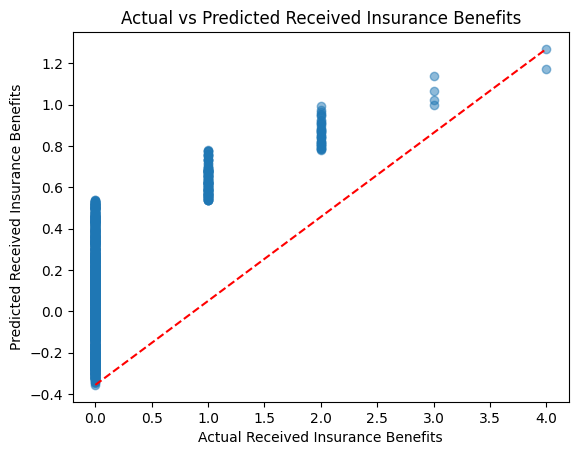

In [33]:
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color = 'red', linestyle = '--')
plt.xlabel('Actual Received Insurance Benefits')
plt.ylabel('Predicted Received Insurance Benefits')
plt.title('Actual vs Predicted Received Insurance Benefits')
plt.show()

Based on the RMSE, R2 values, and the scatterplot above, it's clear that our model has some room for improvement in predicting the number of benefits a customer will receive. Even after scaling, we still get the same RMSE and R2 values, although the weights of each column have changed somewhat, in similar fasion to the scaling in the previous section. The RMSE of 0.34 means that, on average, each prediction the model makes is off by roughly 0.34 benefits. The R2 value of 0.66 means the model explains about 66% of the variation in the model, which isn't bad, but can definitely be better. Looking at the scatterplot, the vertical columns of points make sense along the x-axis, as we know the actual number of benefits received will be a whole number, and we can most likely exclude any negative values as you can't have a benefit taken away from you either. Since most of the points appear above the diagonal, we can safely assume that our model in its current form tends to over-predict the number of benefits a customer receives.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Exactly! So scaling does not change RMSE for Linear Regression, because any changes in the variables will be absorbed into the new coefficients.



One of the advantages of standardization in Linear Regression is that it allows us to interpret the importance of features based on the magnitude of their coefficients: the larger the coefficient, the more important the feature is. Without standardization, such interpretation is not possible because each coefficient also reflects the scale of its corresponding feature.


The second case where standardization is essential is in regularized linear regression models (Ridge, Lasso, and Elastic Net), since these models penalize the coefficients that are affected by scaling.


By the way, due to the nature of floating-point numbers, there may still be slight differences in the digits after the decimal point, which could be critical, for example, in competitions.

</div>


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
    
- We need to run it on both scaled and unscaled data. 
    
    
    
- Please don't forget to scale after splitting. 
  

</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
df_pn.head()

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [35]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [36]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [37]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

P is indeed invertible!

Can you guess the customers' ages or income after the transformation?

In [38]:
X_ob = X @ P
X_ob

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

After transformation, it's most likely impossible to find any of the real values of this sensitive information, which is good!

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [39]:
X_recovered = X_ob @ np.linalg.inv(P)
X_recovered

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [40]:
print(X)
print()
print(X_ob)
print()
print(X_recovered)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]
 ...
 [ 1.57996161e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01 

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

If we know P, and P is invertible, we can find the original data from X', to a certain extent. It's not exactly the same, but looking at the resulting matrix, we can intuit that any element in the matrix with an extremely small negative e value should be treated as 0, whether that number is positive or negative. It appears that this only comes into play on the gender column when the only two outcomes are 0 or 1, so it's easy enough to determine which value is which in this case

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
So we cannot guess the customers' ages or income after the transformation, but we can recover the original data as long as the matrix is invertible.
    
</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

Even with data obfuscation with a linear transformation P, the linear regression model will still behave the exact same, keeping the RMSE, MAE, R2, etc. values unchanged and all predictions would be identical.

**Analytical proof**

Linear regression solves:

$$
w = (X^T X)^{-1} X^T y
$$

Predictions:

$$
\hat{y} = X w
$$

The feature matrix $X$ is obfuscated with matrix $P$ :

$$
X' = X P
$$

Then compute:

$$
w' = (X'^T X')^{-1} X'^T y
$$

Substitute: $$X' = X P $$

$$
w' = ((X P)^T (X P))^{-1} (X P)^T y = (P^T X^T X P)^{-1} P^T X^T y
$$

Now apply matrix inversion identities:

$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Since $ (P^T)^{-1} P^T = I $, we get:

$$
w' = P^{-1} (X^T X)^{-1} X^ y = P^{-1} w
$$


$$
\hat{y}' = X' w' = (X P)(P^{-1} w) = X I w = X w = \hat{y}
$$

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Perfect!     
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
> `<! your comment here !>`


is for your comment :)

</div>

In [41]:
rng = np.random.default_rng(seed = 2356)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.16469875, 0.33320055, 0.87777481, 0.03691443],
       [0.31527768, 0.40598771, 0.46597769, 0.21482026],
       [0.14851763, 0.34783682, 0.89161433, 0.47312845],
       [0.88488978, 0.30010525, 0.95660032, 0.61430724]])

In [42]:
np.linalg.inv(P)

array([[ 0.27605494,  0.41414304, -1.81384692,  1.2355802 ],
       [-0.62640713,  4.01137159, -0.08714576, -1.29799755],
       [ 1.42222086, -1.5975278 ,  0.28008845,  0.25746572],
       [-2.30631671, -0.06854713,  2.21920679,  0.08121636]])

This new random $P$ matrix is invertible as well!

In [43]:
X = df[['gender', 'age', 'income', 'family_members']].to_numpy()
y = df[['insurance_benefits']].to_numpy()

X_ob = X @ P

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2356)
X_ob_train, X_ob_test, _, _, = train_test_split(X_ob, y, test_size = 0.3, random_state = 2356)

lr = MyLinearRegression()
lr_ob = MyLinearRegression()

lr.fit(X_train, y_train)
lr_ob.fit(X_ob_train, y_train)

y_test_pred = lr.predict(X_test)
y_test_pred_ob = lr_ob.predict(X_ob_test)

eval_regressor(y_test, y_test_pred)
eval_regressor(y_test, y_test_pred_ob)

RMSE: 0.34
R2: 0.65
RMSE: 0.34
R2: 0.65


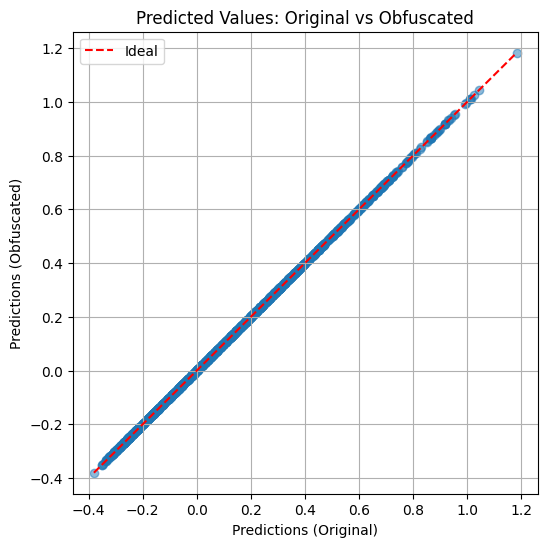

In [44]:
plt.figure(figsize = (6, 6))
plt.scatter(y_test_pred, y_test_pred_ob, alpha = 0.5)
plt.plot([y_test_pred.min(), y_test_pred_ob.max()], [y_test_pred.min(), y_test_pred_ob.max()], color = 'red', 
         linestyle = '--', label = 'Ideal')
plt.xlabel("Predictions (Original)")
plt.ylabel("Predictions (Obfuscated)")
plt.title("Predicted Values: Original vs Obfuscated")
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
So there's no difference when we use obfuscated data.  As a result, we can protect client information.

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
    

Don't forget to add intermediate conclusion to each task. The conclusion below is the general conclusion about the whole project, while this is a conclusion for a specific task. A reader must understand what you are doing in the project without analyzing the code, and they should not look for the specific result when reading the final conclusion :) This will significantly improve your portfolio projects 😉 

</div>

# Conclusions

In summary, we set out to tackle four different problems: Finding customers who are similar to another to help our marketing team do their jobs more effectively, build a model to try and predict whether or not a new customer is likely to receive an insurance benefit, predict the number of insurance benefits a new customer would likely receive, and build and prove an obfuscation method to protect our customers' sensitive information. We first discovered that data not being scaled had a dramatic impact on similar customers, so we need to note that scaling should be used from here on out to ensure that we are looking at similar customers for the marketing department. The prediction model built, while better than a baseline model, still has room for improvement, but showed strong promise for future testing. This was further expanded on when using a Linear Regression model to try and predict the number of insurance benefits a customer may receive, as the model we built tends to over-predict results by about 0.34 benefits. This makes sense as many of the customers from this sample do not receive benefits, and class balancing should show further improvement on that front. Finally, data was successfully obfuscated using an invertible matrix, proven both analytically and computationally, and the resulting RMSE and $R^2$ values were identical between a pre-and post-obfuscated test set. From here, further model improvements can be made by tuning more hyperparameters, and a wider range of datasets can be tested to see how the model handles larger or more balanced sets.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Excellent job!

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>